## The Great-Circle Distance: A Metric for Computing Distances Between 2 Global Points

People have relied on location information since before the dawn of recorded history. Cave dwellers once carved maps of hunting routes into mammoth tusks. Such maps evolved as civilizations flourished. The ancient Babylonians fully mapped the borders of their vast empire. Much later, in 3000 BC, Greek scholars improved cartography using mathematical innovations. The Greeks discovered that the Earth was round and accurately computed the planet’s circumference. Greek mathematicians laid the groundwork for measuring distances across the Earth’s curved surface. Such measurements required the creation of a geographic coordinate system: a rudimentary system based on latitude and longitude was introduced in 2000 BC.

Combining cartography with latitude and longitude helped revolutionize maritime navigation. Sailors could more freely travel the seas by checking their positions on a map. Roughly speaking, maritime navigation protocols followed these three steps:

Data observation—A sailor recorded a series of observations including wind direction, the position of the stars, and (after approximately AD 1300) the northward direction of a compass.

Mathematical and algorithmic analysis of data—A navigator analyzed all of the data to estimate the ship’s position. Sometimes the analysis required trigonometric calculations. More commonly, the navigator consulted a series of rule-based measurement charts. By algorithmically adhering to the rules in the charts, the navigator could figure out the ship’s coordinates.

Visualizing and decision making—The captain examined the computed location on a map relative to the expected destination. Then the captain would give orders to adjust the ship’s orientation based on the visualized results.

This navigation paradigm perfectly encapsulates the standard data science process. As data scientists, we are offered raw observations. We algorithmically analyze that data. Then, we visualize the results to make critical decisions. Thus, data science and location analysis are linked. That link has only grown stronger through the centuries. Today, countless corporations analyze locations in ways the ancient Greeks could never have imagined. Hedge funds study satellite photos of farmlands to make bets on the global soybean market. Transport-service providers analyze vast traffic patterns to efficiently route fleets of cars. Epidemiologists process newspaper data to monitor the global spread of disease.

The direct path between 2 points along the surface of a sphere is called the **great-circle distance**. That distance  depends on a series of well-known trigonometric operations.

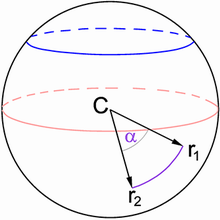

We can compute the great-circle distance given a sphere and two points on that sphere. Any point on the sphere’s surface can be represented using spherical coordinates x and y, where x and y measure the angles of the point relative to the x-axis and y-axis.

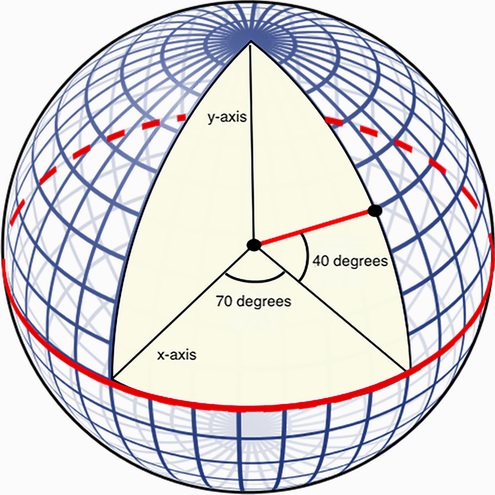

**Defining a great-circle distance function**

In [ ]:
from math import cos, sin, asin

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2), 
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

Lets calculate the great-circle distance between 2 points that lie 180 degrees apart, relative to both the x-axis and the y-axis.

**Computing the great-circle distance**

In [ ]:
from math import pi
distance = great_circle_distance(0, 0, pi, pi)
print(f"The distance equals {distance} units")

The points are exactly π units apart, half the distance required to circumnavigate a unit-circle. This is akin to traveling between the North and South Poles of any planet. We'll confirm by analyzing the latitudes and longitudes of Earth's North Pole and South Pole. Lets begin by recording the known coordinates of each pole.

In [ ]:
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)

Latitudes and longitudes measure spherical coordinates in degrees, not radians. We'll thus convert to radians from degrees using the `np.radians` function. Afterwards, we'll input the radian results into `great_circle_distance`.

**Computing the great-circle distance between poles**

In [ ]:
to_radians =  np.radians([latitude_north, longitude_north, 
                          latitude_south, longitude_south])
distance = great_circle_distance(*to_radians.tolist())
print(f"The unit-circle distance between poles equals {distance} units")

As expected, the distance between poles on a unit-sphere is π . Now, let's measure the distance between 2 poles here on Earth. The radius of the Earth is not 1 hypothetical unit, but rather 3956 actual miles.

**Computing the travel distance between Earth’s poles**

In [ ]:
earth_distance = 3956 * distance
print(f"The distance between poles equals {earth_distance} miles")

Lets create a general `travel_distance` function to calculate the travel mileage between any 2 terrestrial points.

**Defining a travel distance function**

In [ ]:
def travel_distance(lat1, lon1, lat2, lon2):
    to_radians =  np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())

assert travel_distance(90, 0, -90, 0) == earth_distance

## Plotting Maps Using Basemap

Basemap is a Matplotlib extension for generating maps in Python. Lets install the Basemap library, a import the `Basemap` mapping class. Afterwards, we'll initialize the class as `map_plotter = Basemap()`.

**Initializing the Basemap mapping class**

In [ ]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

We are ready to visualize the Earth, by plotting the coastline boundaries of all 7 continents.

**Visualizing the Earth using Basemap**

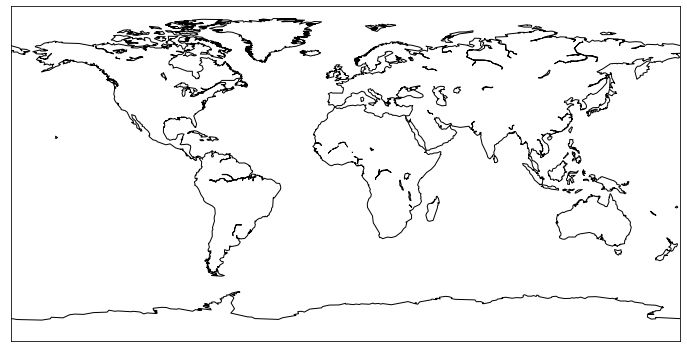

In [ ]:
# Basemap usage generates warning outputs within the Jupyter notebook. 
# We'll use `warnings` module to deactivate these distracting outputs.
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
plt.show()

National boundaries are currently missing from the plot. We can incorporate country boundaries by calling the `map_plotter.drawcountries()` method.

**Mapping coastlines and countries**

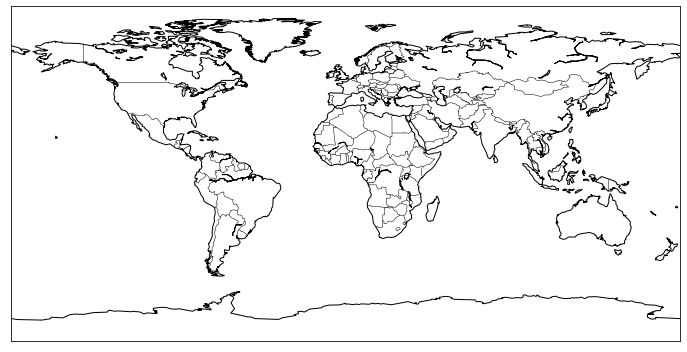

In [ ]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

So far our map looks sparse and uninviting. We can improve the quality by calling `map_plotter.shadedrelief()`. The method-call will color the map using topographic information.

**Coloring a map of the Earth**

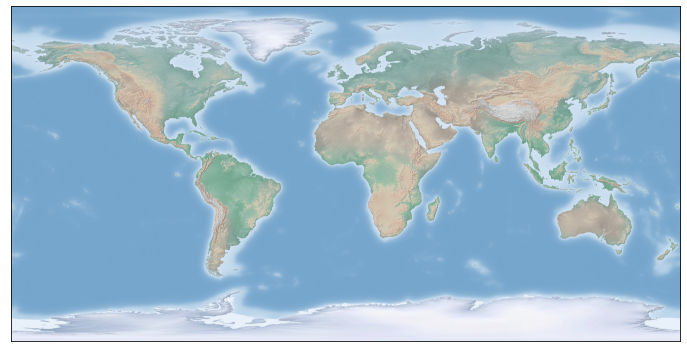

In [ ]:
fig = plt.figure(figsize=(12, 8))
map_plotter.shadedrelief()
plt.show()

Suppose we are given a list of locations defined by pairs of latitudes and longitudes. We can plot these locations on our map by separating the latitudes from the longitudes and then passing the results into `map_plotter.scatter`.

**Plotting coordinates on a map**

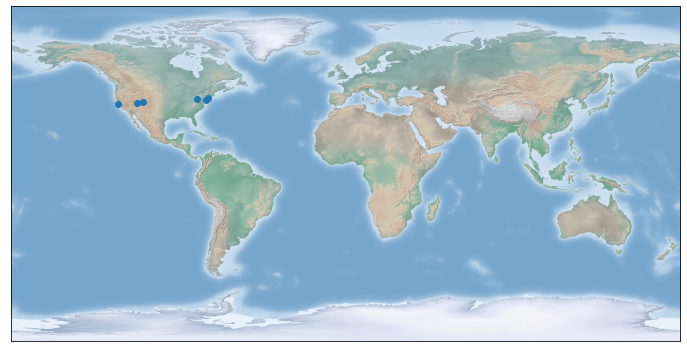

In [ ]:
import numpy as np

fig = plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
               (40.4406, -79.9959), (38.6807, -108.9769),
               (37.8716, -112.2727), (40.7831, -73.9712)]

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

The plotted points all appear within the boundaries of North America. We thusly can simplify the map by zooming in on North America. In order to adjust the map, we must alter our projection.

**Plotting North American Coordinates**

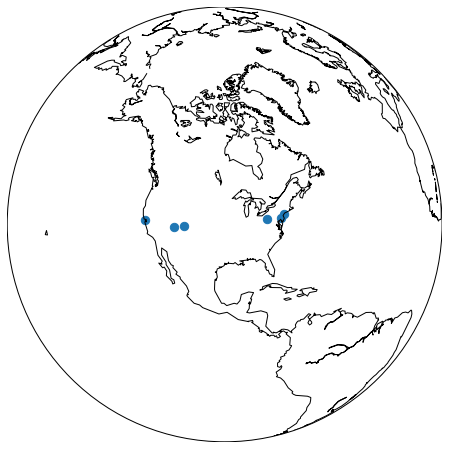

In [ ]:
fig = plt.figure(figsize=(12, 8))
map_ortho = Basemap(projection='ortho', lat_0=40, lon_0=-95)
map_ortho.scatter(longitudes, latitudes, latlon=True,
                  s=70)
map_ortho.drawcoastlines()
plt.show()

We successfully zoomed in on North America. Now, we'll zoom in further, onto the United States.

**Plotting USA Coordinates**

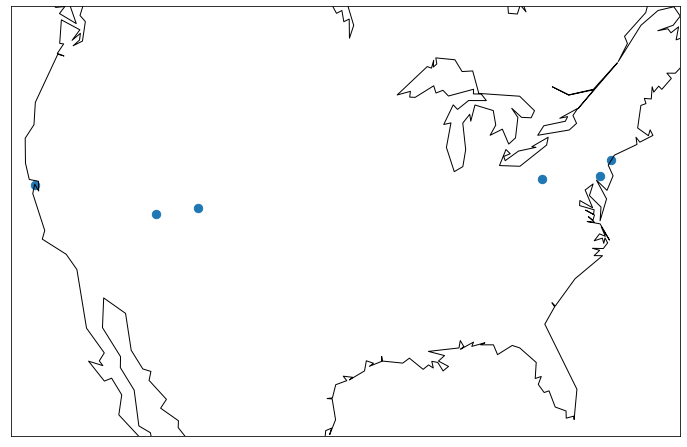

In [ ]:
fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, 
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, 
                  lat_2=45)

map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
plt.show()

Our map of the United States is looking a little sparse. Lets add state boundaries to the map by calling `map_lcc.drawstates()`.

**Mapping state boundaries in the USA**

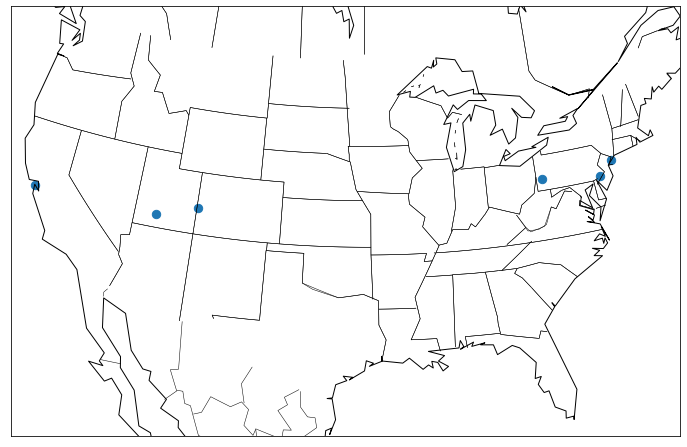

In [ ]:
fig = plt.figure(figsize=(12, 8))
map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()

Basemap allows us to plot any location on a map. All we need is the location’s latitude and longitude. Thus, we need a mapping between location names and their geographic properties. That mapping is provided by the GeoNamesCache location-tracking library.

## Location Tracking Using GeoNamesCache

GeoNamesCache is designed to efficiently retrieve data pertaining to continents, countries, and cities, as well US counties and US states. Lets install the library and explore its usage in more detail. We'll begin by initializing a `GeonamesCache` location-tracking object.

In [ ]:
!pip install geonamescache

In [ ]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

Lets use our `gc` object to explore the 7 continents. We'll run `gc.get_continents()` in order to retrieve a dictionary of continent-related information.

**Fetching all 7 continents from GeoNamesCache**

In [ ]:
continents = gc.get_continents()
print(continents.keys())

dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])


The dictionary keys represent shorthand encoding of continent names, in which __Africa__ is transformed into `'AF'`, and __North America__ is transformed into `'NA'`. Lets check the values mapped to every key by passing in the code for __North America__.

**Fetching North America from GeoNamesCach**

In [ ]:
north_america = continents['NA']
print(north_america.keys())

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])


Many of the `north_america` data elements represent the various naming schemes for the North American continent. Such information is not very useful.

**Printing North America’s naming schemas**

In [ ]:
for name_key in ['name', 'asciiName', 'toponymName']:
    print(north_america[name_key])

North America
North America
North America


The  `'lat'` and the `'lng'` keys map to the latitude and longitude of the central-most location in the continent. We can utilize these coordinates to plot a map projection centered at the heart of North America.

**Mapping North America’s central coordinates**

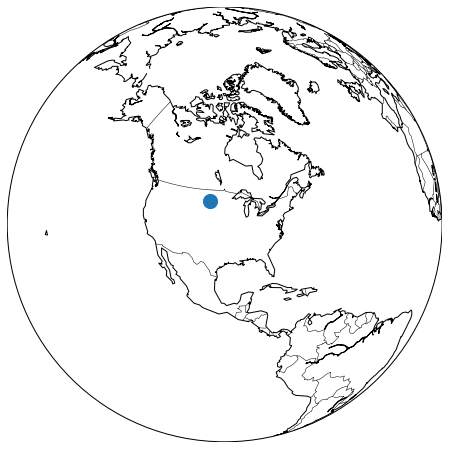

In [ ]:
latitude = float(north_america['lat'])
longitude = float(north_america['lng'])

fig = plt.figure(figsize=(12, 8))
map_plotter = Basemap(projection='ortho',lat_0=40, lon_0=-95)
map_plotter.scatter([longitude], [latitude], latlon=True, s=200)
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

## Accessing Country Information
We can analyze countries using the `get_countries` method. It returns a dictionary whose 2-character keys encode the names of 252 different countries. Accessing `gc.get_countries()['US']` will return a dictionary containing useful USA statistics. Lets output all the non-city information pertaining to the United States.

**Fetching US data from GeoNamesCache**

In [ ]:
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache holds data for {num_countries} countries.")

us_data = countries['US']
print("The following data pertains to the United States:")
print(us_data)

GeonamesCache holds data for 252 countries.
The following data pertains to the United States:
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}


There is valuable information within each country's `'neighbours'` element. It maps to a comma-delimited string
of country codes that signify all neighboring territories. We can obtain more details about each neighbor by splitting the string and passing the codes into the `'countries'` dictionary.

**Fetching neighboring countries**

In [ ]:
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])

Canada
Mexico
Cuba


We can also query all countries by name using the `get_countries_by_names` method. This method returns a dictionary whose elements are country names rather than codes.

**Fetching countries by name**

In [ ]:
result = gc.get_countries_by_names()['United States']
assert result == countries['US']
countries['US']

{'areakm2': 9629091,
 'capital': 'Washington',
 'continentcode': 'NA',
 'currencycode': 'USD',
 'currencyname': 'Dollar',
 'fips': 'US',
 'geonameid': 6252001,
 'iso': 'US',
 'iso3': 'USA',
 'isonumeric': 840,
 'languages': 'en-US,es-US,haw,fr',
 'name': 'United States',
 'neighbours': 'CA,MX,CU',
 'phone': '1',
 'population': 310232863,
 'postalcoderegex': '^\\d{5}(-\\d{4})?$',
 'tld': '.us'}

## Accessing City Information

The `get_cities` method returns a dictionary whose keys are unique ids mapping back to city data.

**Fetching cities from GeoNamesCache**

In [ ]:
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache holds data for {num_cities} total cities")
city_id = list(cities.keys())[0]
print(cities[city_id])

GeoNamesCache holds data for 25286 total cities
{'geonameid': 3041563, 'name': 'Andorra la Vella', 'latitude': 42.50779, 'longitude': 1.52109, 'countrycode': 'AD', 'population': 20430, 'timezone': 'Europe/Andorra', 'admin1code': '07', 'alternatenames': ['ALV', 'Ando-la-Vyey', 'Andora', 'Andora la Vela', 'Andora la Velja', "Andora lja Vehl'ja", 'Andoro Malnova', 'Andorra', 'Andorra Tuan', 'Andorra a Vella', 'Andorra la Biella', 'Andorra la Vella', 'Andorra la Vielha', 'Andorra-a-Velha', "Andorra-la-Vel'ja", 'Andorra-la-Vielye', 'Andorre-la-Vieille', 'Andò-la-Vyèy', 'Andòrra la Vièlha', 'an dao er cheng', 'andolalabeya', 'andwra la fyla', 'Ανδόρρα', 'Андора ла Веля', 'Андора ла Веља', 'Андора ля Вэлья', 'Андорра-ла-Велья', 'אנדורה לה וולה', 'أندورا لا فيلا', 'አንዶራ ላ ቬላ', 'アンドラ・ラ・ヴェリャ', '安道爾城', '안도라라베야']}


The data for each city contains the reference code for the country where that city is located. By utilizing the country code, we can create a new mapping between a country and all its territorial cities.

**Fetching US cities from GeoNamesCache**

In [ ]:
us_cities = [city for city in cities.values() 
             if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache holds data for {num_us_cities} US cities.")

GeoNamesCache holds data for 3264 US cities.


Lets find the average US latitude and longitude. This average will approximate the central coordinates of the United States.

**Approximating US central coordinates**

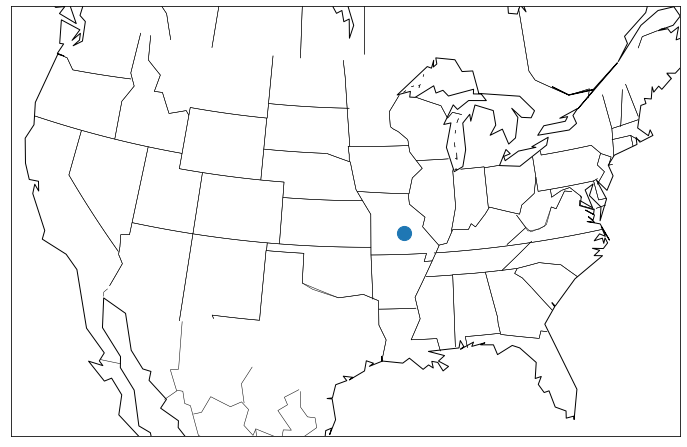

In [ ]:
center_lat = np.mean([city['latitude'] 
                      for city in us_cities])
center_lon = np.mean([city['longitude'] 
                       for city in us_cities])

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, 
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, 
                  lat_2=45)
map_lcc.scatter([center_lon], [center_lat], latlon=True, s=200)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()

The `get_cities` method is suitable for iterating over city information, but not for querying cities by name. To run a name-based city search, we must rely on `get_cities_by_name`. 

**Fetching cities by name**

In [ ]:
matched_cities_list = gc.get_cities_by_name('Philadelphia')
print(matched_cities_list)

[{'4560349': {'geonameid': 4560349, 'name': 'Philadelphia', 'latitude': 39.95233, 'longitude': -75.16379, 'countrycode': 'US', 'population': 1567442, 'timezone': 'America/New_York', 'admin1code': 'PA', 'alternatenames': ['Coaquannock', 'Fi-sang', 'Fi-sàng', "Filadehl'fija", "Filadel'fi", "Filadel'fij", "Filadel'fija", 'Filadelfi', 'Filadelfia', 'Filadelfiae', 'Filadelfie', 'Filadelfii', 'Filadelfija', 'Filadelfijo', 'Filadelfio', 'Filadelfiya', 'Filadelfiye', 'Filadelfiä', 'Filadèlfia', 'Filadélfia', 'Filadélfiye', 'Ga-na-ta-jen-go-na', 'PHL', 'Phila', 'Philadelpheia', 'Philadelphia', 'Philadelphie', 'Philly', 'Quequenakee', 'Tsi wahswen:to Tekahso:ken', 'Tsi wahswèn:to Tekahsó:ken', 'fei cheng', 'fi la delfeiy', "filadailafi'a", 'firaderufia', 'flaڈylfya', 'fyladlfya', 'fyladlfya  pnsylwanya', 'philadelaphiya', 'philadelphiya', 'piladelpia', 'pilatelpiya', 'pilladelpia', 'pyldlpyh', 'Φιλαδέλφεια', 'Филаделфиа', 'Филаделфия', 'Филаделфија', 'Филадельфи', 'Филадельфий', 'Филадельфия', '

The `get_cities_by_name` method may return more than one city, because city-names are not always unique. For example, GeoNamesCache contains 6 different instances of the city __San Francisco__, spanning across 5 different countries.

**Fetching multiple cities with a shared name**

In [ ]:
matched_cities_list = gc.get_cities_by_name('San Francisco')

for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = countries[country_code]['name']
    print(f"The San Francisco at index {i} is located in {country}")

The San Francisco at index 0 is located in Argentina
The San Francisco at index 1 is located in Costa Rica
The San Francisco at index 2 is located in Philippines
The San Francisco at index 3 is located in Philippines
The San Francisco at index 4 is located in El Salvador
The San Francisco at index 5 is located in United States


Its common for multiple cities to share the same name. Choosing among such cities is quite difficult. Usually, the safest guess is the city with the largest population. 

**Mapping the most populous San Francisco**

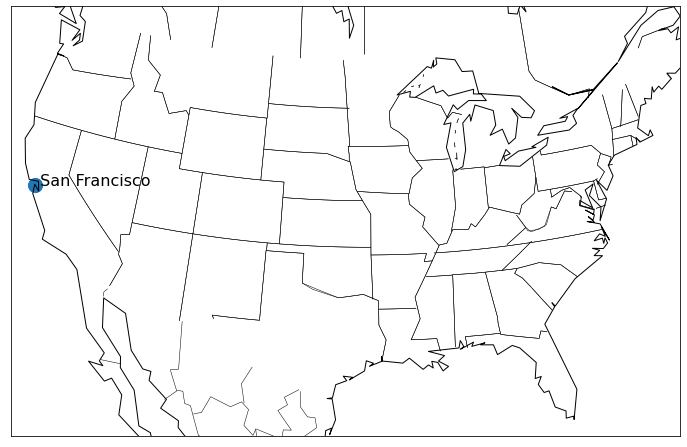

In [ ]:
best_sf = max(gc.get_cities_by_name('San Francisco'), 
              key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, 
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, 
                  lat_2=45)
map_lcc.scatter([sf_lon], [sf_lat], latlon=True, s=200)
map_lcc.drawcoastlines()
map_lcc.drawstates()

x, y = map_lcc(sf_lon, sf_lat)
plt.text(x, y, ' San Francisco', fontsize=16)
plt.show()

### Limitations of the GeoNamesCache Library

The `get_cities_by_name` method maps only one version of a city's name to its geographic data. This poses a problem for cities like __New York__, which carry more than one commonly referenced name.

**Fetching New York City from GeoNamesCache**

In [ ]:
for ny_name in ['New York', 'New York City']:
    if not gc.get_cities_by_name(ny_name):
        print(f"'{ny_name}' is not present in GeoNamesCache database.")
    else:
        print(f"'{ny_name}' is present in GeoNamesCache database.")

'New York' is not present in GeoNamesCache database.
'New York City' is present in GeoNamesCache database.


The limits of single references become particularly obvious when we examine diacritics in city names. Diacritics are accent marks that designate the proper pronunciation of foreign-sounding words. 

**Fetching accented cities from GeoNamesCache**

In [ ]:
print(gc.get_cities_by_name(u'Cañon City'))
print(gc.get_cities_by_name(u'Hagåtña'))

[{'5416005': {'geonameid': 5416005, 'name': 'Cañon City', 'latitude': 38.44098, 'longitude': -105.24245, 'countrycode': 'US', 'population': 16400, 'timezone': 'America/Denver', 'admin1code': 'CO', 'alternatenames': ['CNE', 'Canon City', 'Canyon City', 'Cañon City', 'East Canon', 'Kanon Siti', 'Kanono siti', 'Keniun Siti', 'kann syty  klradw', 'kanwn syty', 'kyanana siti', 'Каноно сити', 'Кањон Сити', 'Кениън Сити', 'كانون سيتي', 'کانن سیتی، کلرادو', 'کینن سٹی، کولوراڈو', 'क्यानन सिटी']}}]
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khaga

How many of the cities stored in GeoNamesCache contain diacritics in their name? We can find out using the `unidecode` function from the external Unidecode library.

**Counting all accented cities in GeoNamesCache**

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values()
                  if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)

print(f"An example accented city name is '{accented_names[0]}'")
print(f"{num_accented_cities} cities have accented names") 

An example accented city name is 'Khawr Fakkān'
4938 cities have accented names


We can now match the stripped dictionary keys against all inputted text by passing the accented dictionary values into GeoNamesCache, whenever a key-match is found.

**Finding accent-free city-names in text**

In [ ]:
alternative_names = {unidecode(name): name 
                     for name in accented_names}
print(gc.get_cities_by_name(alternative_names['Hagatna']))

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


## Matching Location Names in Text

In Python, we can easily determine if one string is a substring of another, or if the start of a string contains some predefined text.

**Basic string matching**

In [ ]:
text = u'This sentence matches Hagatna'
for key, value in alternative_names.items():
    if key in text:
        print(gc.get_cities_by_name(value))
        break

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


In more complex analyses, Python's basic string syntax can be quite limiting. For example, Python's string methods can't directly distinguish between sub-characters in a string and sub-phrases in a sentence.

**Basic sub-string matching errors**

In [ ]:
assert 'in a' in 'sin apple'
assert 'in a' in 'win attached'

To overcame these limitations, we must rely on Python's built-in regular expression processing library, `re`. A **regular expression** (or **regex** for short) is a string-encoded pattern that can be compared against some text. Most regex-matching in Python can be executed with the `re.search` function. 

**String matching using regexes**

In [ ]:
import re
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'

Case-insensitive string matching is a breeze with `re.search`. We simply pass `re.IGNORECASE` as an added `flags` parameter.

**Case-insensitive matching using regexes**

In [ ]:
for text in ['BOSTON', 'boston', 'BoSTOn']:
    assert re.search(regex, text, flags=re.IGNORECASE) is not None

Also, regexes permit us to match exact words, and not just substrings, using word boundary detection.

**Word boundary matching using regexes**

In [ ]:
for regex in ['\\bin a\\b', r'\bin a\b']:
    for text in ['sin apple', 'win attached']:
        assert re.search(regex, text) is None
        
    text = 'Match in a string'
    assert re.search(regex, text) is not None

Now, let us carry out a more complicated match. We'll match against the sentence `f'I visited {city} yesterday`, where `{city}` represents one of 3 possible locations; `'Boston'`, `'Philadelphia'`, or `'San Francisco'`.

**Multi-city matching using regexes**

In [ ]:
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.'
assert re.search(regex, 'I visited Chicago yesterday.') is None

cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None

Suppose we want to match a regex against 100 strings. For every match, `re.search`  will transform the regex into Python `PatternObject.` Each such transformation is computationally costly. We're better off executing the transformation only once using `re.compile`.

**String matching using compiled regexes**

In [ ]:
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None